# Proyek Analisis Data: [Input Nama Dataset]

- **Nama:** Teuku Muhammad Faiz Nuzullah
- **Email:** faiznuzullah@gmail.com
- **ID Dicoding:** faiznuzullah

## Menentukan Pertanyaan Bisnis

1. Bagaimana kita dapat menyesuaikan strategi layanan penyewaan sepeda untuk mengoptimalkan pemanfaatan jam-jam penting tersebut dan meningkatkan pendapatan bisnis?
2. Kapan Waktu yang Efektif untuk Meningkatkan Penyewaan Sepeda?
3. Pada Musim apa Jumlah Sewa Meningkat?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

This code is reading a CSV file named "hour.csv" located at "E:/DICODING PROJECT/Bike/" using pandas library and storing the data in a DataFrame called `hour_df`. The `sep=','` parameter specifies that the data in the CSV file is separated by commas.

In [24]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/ziandut/Dicoding-Project-Analisis/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [3]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


This code snippet is converting the 'dteday' column in the DataFrame `hour_df` to a datetime format using the `pd.to_datetime()` function from the pandas library.

In [4]:
hour_df['dteday']= pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [5]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi", hour_df.duplicated().sum())

Jumlah duplikasi 0


### Cleaning Data

This code snippet is performing outlier detection using the Interquartile Range (IQR) method. 
Here's a breakdown of the steps:

In [7]:
Q1 = hour_df['cnt'].quantile(0.25)
Q3 = hour_df['cnt'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier = hour_df[(hour_df['cnt'] < lower_bound) | (hour_df['cnt'] > upper_bound)]
outlier

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5536,5537,2011-08-23,3,0,8,14,0,2,1,1,0.72,0.6515,0.30,0.0896,149,502,651
10358,10359,2012-03-12,1,1,3,17,0,1,1,2,0.62,0.6212,0.38,0.4179,87,557,644
10359,10360,2012-03-12,1,1,3,18,0,1,1,2,0.60,0.6212,0.43,0.1940,89,623,712
10382,10383,2012-03-13,1,1,3,17,0,2,1,1,0.70,0.6364,0.37,0.1045,62,614,676
10383,10384,2012-03-13,1,1,3,18,0,2,1,1,0.70,0.6364,0.34,0.2985,96,638,734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16885,16886,2012-12-11,4,1,12,8,0,2,1,2,0.34,0.3030,0.61,0.2985,16,708,724
16909,16910,2012-12-12,4,1,12,8,0,3,1,2,0.26,0.2576,0.65,0.1642,18,670,688
16933,16934,2012-12-13,4,1,12,8,0,4,1,1,0.24,0.2273,0.60,0.1940,24,655,679
17053,17054,2012-12-18,4,1,12,8,0,2,1,1,0.38,0.3939,0.94,0.0000,10,652,662


In [8]:
outlier.shape

(505, 17)

This line of code filters the DataFrame `hour_df` based on the condition that the 'cnt' column values are greater than or equal to `lower_bound` and less than or equal to `upper_bound`. The resulting DataFrame will only contain rows where the 'cnt' values fall within this specified range.

In [9]:
hour_df = hour_df[(hour_df['cnt'] >= lower_bound) & (hour_df['cnt'] <= upper_bound)]
hour_df.shape

(16874, 17)

In [10]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

The code `hour_df.describe(include='all')` is generating a summary statistics of the DataFrame `hour_df`, including both numeric and non-numeric columns. The `include='all'` parameter ensures that all columns are included in the summary statistics. This will provide information such as count, mean, standard deviation, minimum, maximum, and quartile values for each column in the DataFrame.

In [11]:
hour_df.describe(include='all')

C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_20380\2781978731.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include='all')


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,16874.000000,16874,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8542.168899,NaN,2.490399,0.487733,6.513275,11.458101,0.029513,2.997748,0.678618,1.430663,0.492650,0.471970,0.630412,0.189619,33.418632,139.291514,172.710146
std,5007.766040,NaN,1.111966,0.499864,3.462438,6.962144,0.169244,2.013054,0.467021,0.642689,0.192455,0.171878,0.192600,0.122460,45.896591,126.052802,155.020918
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4219.250000,NaN,1.000000,0.000000,4.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,32.000000,38.000000


This code snippet is grouping the data in the `hour_df` DataFrame by the columns 'hr' and 'holiday'. It then calculates the sum of the 'cnt' column for each group. The `unstack()` function is used to pivot the resulting grouped data so that the 'holiday' values become columns in the output DataFrame.

In [12]:
by_hour = hour_df.groupby(['hr', 'holiday'])['cnt'].agg("sum").unstack()
by_hour

holiday,0,1
hr,,
0,37923,1207
1,23347,817
2,15817,535
3,7965,209
4,4311,117
5,14038,223
6,54538,594
7,152446,1725
8,167134,3581


`by_hour.plot(kind="bar")` is a code snippet that is likely used to create a bar plot visualization of the data stored in the `by_hour` variable. The `kind="bar"` parameter specifies the type of plot to be created, in this case, a bar plot. This code will display the data in `by_hour` as a bar chart, with the x-axis representing the hours and the y-axis representing the values associated with each hour.

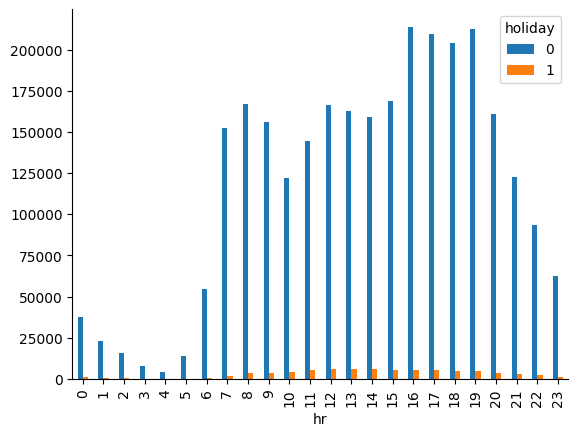

In [13]:
by_hour.plot(kind="bar")
sns.despine(top=True, right=True, left=False, bottom=False)

## Visualization & Explanatory Analysis

This code snippet is creating a figure and axes using `plt.subplots()` with a specific figure size of 12x6. It then plots a seaborn pointplot using the data from `hour_df` DataFrame, where 'hr' is plotted on the x-axis, 'cnt' on the y-axis, and 'season' is used for coloring different points. The plot is displayed with a title "Season wise hourly distribution of counts" along with labeled x and y axes showing "Hour" and "Count" respectively.

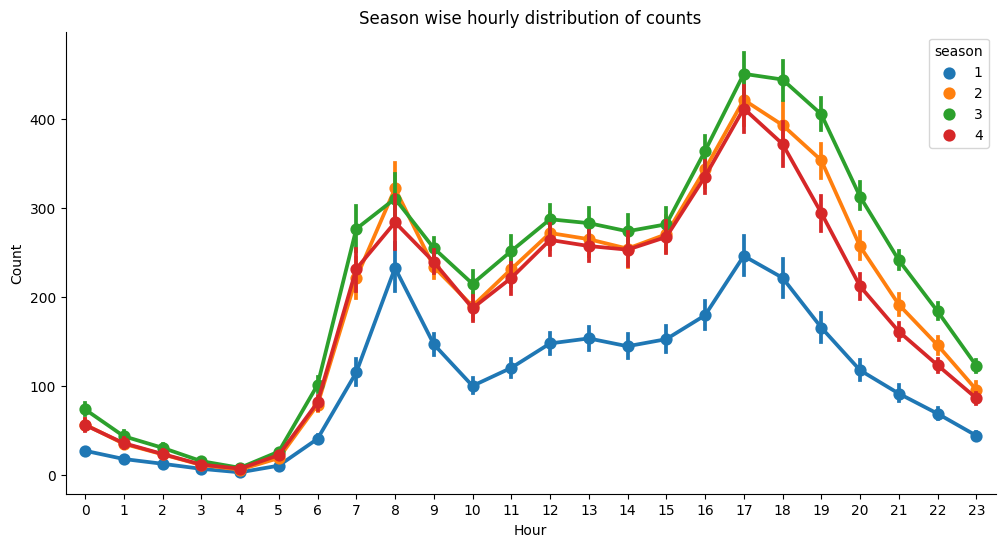

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.pointplot(data=hour_df, x='hr', y='cnt', hue='season', ax=ax)
sns.despine(top=True, right=True, left=False, bottom=False)
ax.set(title="Season wise hourly distribution of counts", xlabel="Hour", ylabel="Count")
plt.show()

### Pertanyaan 1 : Bagaimana kita dapat menyesuaikan strategi layanan penyewaan sepeda untuk mengoptimalkan pemanfaatan jam-jam penting tersebut dan meningkatkan pendapatan bisnis?

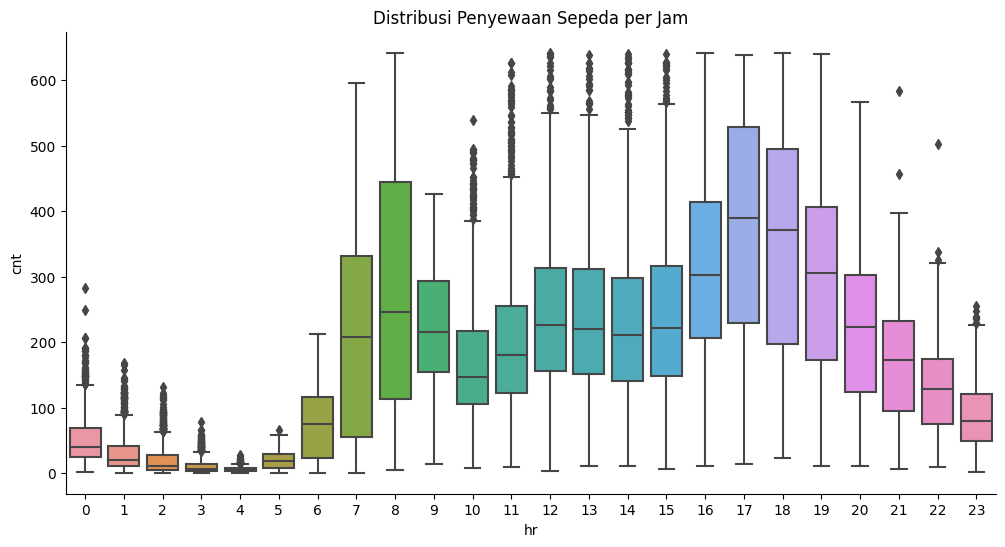

In [15]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='hr', y='cnt', data=hour_df)
plt.title('Distribusi Penyewaan Sepeda per Jam')
sns.despine(top=True, right=True, left=False, bottom=False)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

### Pertanyaan 2 : Kapan Waktu yang Efektif untuk Meningkatkan Penyewaan Sepeda?

Text(0.5, 1.0, 'Distribusi Penyewaan Sepeda per Minggu')

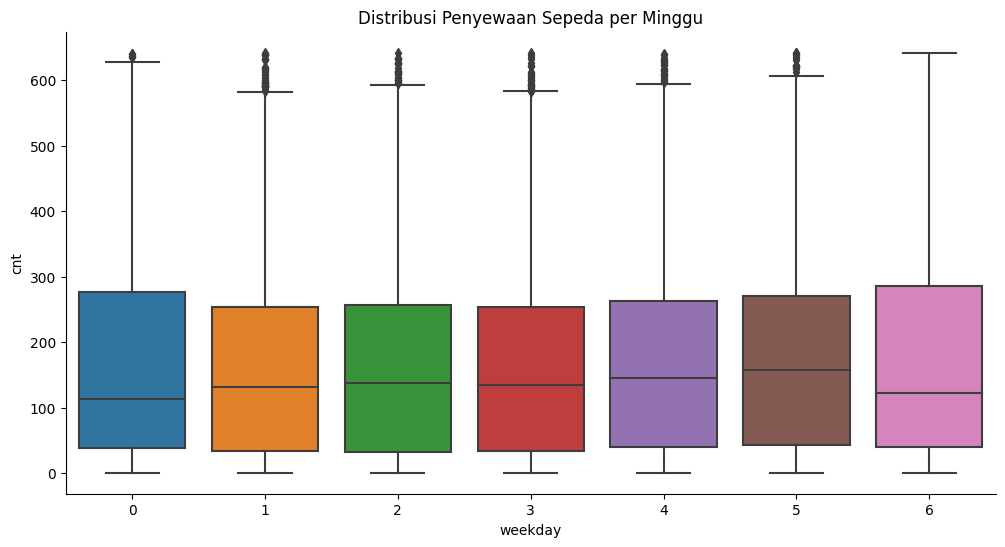

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(x='weekday', y='cnt', data=hour_df)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.title('Distribusi Penyewaan Sepeda per Minggu')


### Pertanyaan 3 : Pada Musim apa Jumlah Sewa Meningkat?

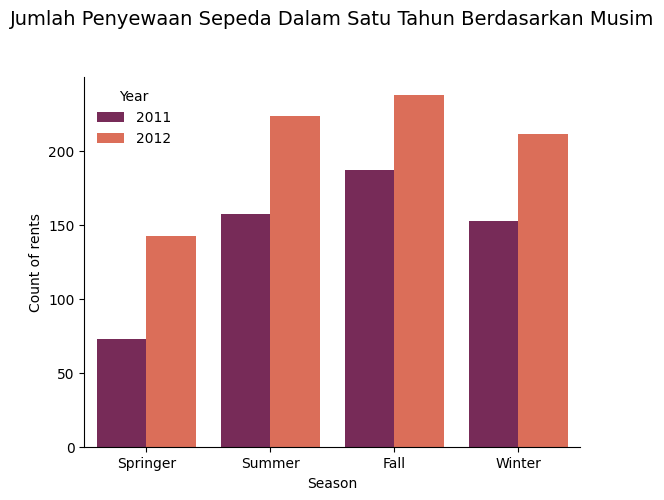

In [22]:
bar = sns.barplot(data=hour_df,x="season",  y="cnt", hue="yr", palette="rocket", errorbar=None)
sns.despine(top=True, right=True, left=False, bottom=False)

plt.ylabel('Count of rents')
plt.xlabel('Season')
plt.title("Jumlah Penyewaan Sepeda Dalam Satu Tahun Berdasarkan Musim", size=14, y=1.12)

plt.xticks([0,1,2,3],['Springer', 'Summer', 'Fall', 'Winter'])

plt.legend(title='Year', loc='best', labels=['2011', '2012'], frameon=False)
plt.show(bar)

### Conclusion

- Distribusi Penyewaan Sepeda per Jam:
> Dari visualisasi Distribusi Penyewaan Sepeda per Jam, terlihat bahwa penggunaan sepeda cenderung antara pukul 7 - 9 pagi dan 4 - 8 malam, jam-jam ini sangat penting untuk bisnis dan peluang potensial untuk peningkatan layanan agar memperoleh keuntungan yang besar. Dapat dilihat dari boxplot tersebut tidak mempunyai outlier dan memiliki batas atas yang tinggi.
- Distribusi Penyewaan Sepeda per Minggu:
> Penyewaan Sepeda relatif bagus disaat hari libur seperti hari sabtu dan hari minggu. Dapat dilihat bahwa batas maksimum dari ke 2 boxplot tersebut tertinggi dan tidak terdapat banyak outlier. Sehingga disarankan untuk memanfaatkan hari libur  untuk menambah fasilitas dan lainnya.
- Jumlah Penyewaan Sepeda Dalam Satu Tahun Berdasarkan Musim:
> Dari visualisasi Jumlah Penggunaan Sepeda Dalam Satu Tahun Berdasarkan Musim. Dapat dilihat bahwa pada musim gugur memiliki jumlah penyewaan sepeda paling banyak dibandingak musim lainnya baik di tahun 2011 maupun 2012. Disarankan untuk meningkatkan jumlah fasilitas sepeda pada musim gugur